In [103]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [104]:
sp100 = yf.Ticker("^GSPC")

In [105]:
sp100

yfinance.Ticker object <^GSPC>

In [147]:
sp100.index

DatetimeIndex(['1983-12-14 00:00:00-05:00', '1983-12-15 00:00:00-05:00',
               '1983-12-16 00:00:00-05:00', '1983-12-19 00:00:00-05:00',
               '1983-12-20 00:00:00-05:00', '1983-12-21 00:00:00-05:00',
               '1983-12-22 00:00:00-05:00', '1983-12-23 00:00:00-05:00',
               '1983-12-27 00:00:00-05:00', '1983-12-28 00:00:00-05:00',
               ...
               '2023-08-21 00:00:00-04:00', '2023-08-22 00:00:00-04:00',
               '2023-08-23 00:00:00-04:00', '2023-08-24 00:00:00-04:00',
               '2023-08-25 00:00:00-04:00', '2023-08-28 00:00:00-04:00',
               '2023-08-29 00:00:00-04:00', '2023-08-30 00:00:00-04:00',
               '2023-08-31 00:00:00-04:00', '2023-09-01 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=10011, freq=None)

In [109]:
sp100 = sp100.history(period="max")


In [110]:
del sp100["Stock Splits"]
del sp100["Dividends"]

<Axes: xlabel='Date'>

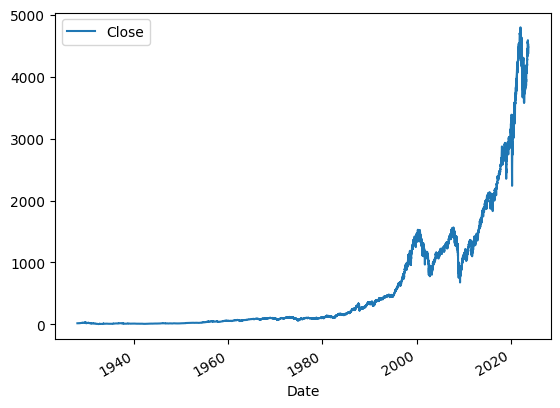

In [111]:
sp100.plot.line(y = "Close" , use_index = True)

In [112]:
sp100["Tomorrow"] = sp100["Close"].shift(-1)

In [113]:
sp100

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-08-28 00:00:00-04:00,4426.029785,4439.560059,4414.979980,4433.310059,2957230000,4497.629883
2023-08-29 00:00:00-04:00,4432.750000,4500.140137,4431.680176,4497.629883,3354820000,4514.870117
2023-08-30 00:00:00-04:00,4500.339844,4521.649902,4493.589844,4514.870117,3064110000,4507.660156


In [114]:
sp100["Target"] = (sp100["Tomorrow"] > sp100["Close"]).astype(int)

In [115]:
sp100

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-08-28 00:00:00-04:00,4426.029785,4439.560059,4414.979980,4433.310059,2957230000,4497.629883,1
2023-08-29 00:00:00-04:00,4432.750000,4500.140137,4431.680176,4497.629883,3354820000,4514.870117,1
2023-08-30 00:00:00-04:00,4500.339844,4521.649902,4493.589844,4514.870117,3064110000,4507.660156,0


In [116]:
sp100 = sp100.loc["1980-01-01":].copy()

In [117]:
sp100

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-01-02 00:00:00-05:00,0.000000,108.430000,105.290001,105.760002,40610000,105.220001,0
1980-01-03 00:00:00-05:00,0.000000,106.080002,103.260002,105.220001,50480000,106.519997,1
1980-01-04 00:00:00-05:00,0.000000,107.080002,105.089996,106.519997,39130000,106.809998,1
1980-01-07 00:00:00-05:00,0.000000,107.800003,105.800003,106.809998,44500000,108.949997,1
1980-01-08 00:00:00-05:00,0.000000,109.290001,106.290001,108.949997,53390000,109.050003,1
...,...,...,...,...,...,...,...
2023-08-28 00:00:00-04:00,4426.029785,4439.560059,4414.979980,4433.310059,2957230000,4497.629883,1
2023-08-29 00:00:00-04:00,4432.750000,4500.140137,4431.680176,4497.629883,3354820000,4514.870117,1
2023-08-30 00:00:00-04:00,4500.339844,4521.649902,4493.589844,4514.870117,3064110000,4507.660156,0


In [118]:
from sklearn.ensemble import RandomForestClassifier

train_model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp100.iloc[:-100]
test = sp100.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
train_model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [119]:
RandomForestClassifier(min_samples_split=100, random_state=1)


RandomForestClassifier(min_samples_split=100, random_state=1)

In [120]:
from sklearn.metrics import precision_score

preds = train_model.predict(test[predictors])


In [121]:
preds = pd.Series(preds, index=test.index)
preds

Date
2023-04-12 00:00:00-04:00    0
2023-04-13 00:00:00-04:00    0
2023-04-14 00:00:00-04:00    1
2023-04-17 00:00:00-04:00    1
2023-04-18 00:00:00-04:00    0
                            ..
2023-08-28 00:00:00-04:00    0
2023-08-29 00:00:00-04:00    0
2023-08-30 00:00:00-04:00    0
2023-08-31 00:00:00-04:00    1
2023-09-01 00:00:00-04:00    0
Length: 100, dtype: int32

In [122]:
precision_score(test["Target"], preds)

0.5757575757575758

<Axes: xlabel='Date'>

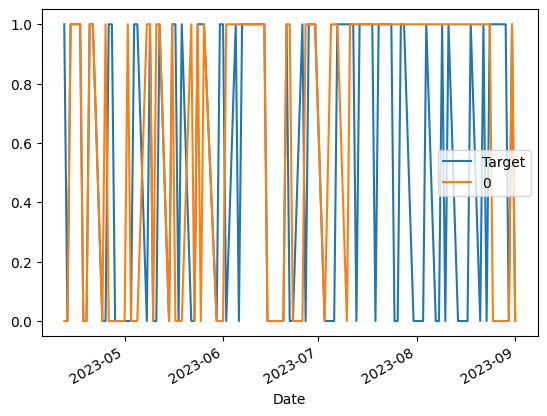

In [123]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [124]:
def predict(train, test, predictors, model):
    train_model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [130]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, train_model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [131]:
predictions = backtest(sp100, train_model, predictors)


In [132]:
predictions["Predictions"].value_counts()

Predictions
0    5322
1    3189
Name: count, dtype: int64

In [133]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5296331138287864

In [135]:
precision_score

<function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [136]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.534602
0    0.465398
Name: count, dtype: float64

In [137]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp100.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp100[ratio_column] = sp100["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp100[trend_column] = sp100.shift(1).rolling(horizon).sum()["Target"]
      
    new_predictors+= [ratio_column, trend_column]
    

In [138]:
sp100 = sp100.dropna(subset=sp100.columns[sp100.columns != "Tomorrow"])

In [139]:
sp100

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1983-12-14 00:00:00-05:00,164.929993,164.929993,163.250000,163.330002,85430000,161.660004,0,0.995126,0.0,0.990888,1.0,0.980833,30.0,1.022770,138.0,1.242921,508.0
1983-12-15 00:00:00-05:00,163.330002,163.330002,161.660004,161.660004,88300000,162.389999,1,0.994861,0.0,0.984987,1.0,0.971461,30.0,1.011728,137.0,1.229685,508.0
1983-12-16 00:00:00-05:00,161.690002,162.389999,161.580002,162.389999,81030000,162.320007,0,1.002253,1.0,0.992689,2.0,0.976569,30.0,1.015698,137.0,1.234713,508.0
1983-12-19 00:00:00-05:00,162.339996,162.880005,162.270004,162.320007,75180000,162.000000,0,0.999784,1.0,0.996281,1.0,0.976852,30.0,1.014686,136.0,1.233660,507.0
1983-12-20 00:00:00-05:00,162.330002,162.800003,161.639999,162.000000,83740000,163.559998,1,0.999013,0.0,0.997906,1.0,0.975716,29.0,1.012184,135.0,1.230731,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-28 00:00:00-04:00,4426.029785,4439.560059,4414.979980,4433.310059,2957230000,4497.629883,1,1.003123,2.0,1.005793,3.0,0.999272,32.0,1.087216,120.0,1.150666,531.0
2023-08-29 00:00:00-04:00,4432.750000,4500.140137,4431.680176,4497.629883,3354820000,4514.870117,1,1.007202,2.0,1.015314,4.0,1.012951,32.0,1.102437,121.0,1.166900,532.0
2023-08-30 00:00:00-04:00,4500.339844,4521.649902,4493.589844,4514.870117,3064110000,4507.660156,0,1.001913,2.0,1.015589,4.0,1.015914,33.0,1.106056,122.0,1.170907,532.0


In [140]:
train_model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [141]:
def predict(train, test, predictors, train_model):
    train_model.fit(train[predictors], train["Target"])
    preds = train_model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [142]:
predictions = backtest(sp100, train_model, new_predictors)

In [143]:
predictions["Predictions"].value_counts()

Predictions
0.0    6309
1.0    1202
Name: count, dtype: int64

In [144]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5682196339434277

In [145]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.537212
0    0.462788
Name: count, dtype: float64

In [146]:
predictions

,Target,Predictions
Date,,
1993-11-03 00:00:00-05:00,0,0.0
1993-11-04 00:00:00-05:00,1,1.0
1993-11-05 00:00:00-05:00,1,0.0
1993-11-08 00:00:00-05:00,1,0.0
1993-11-09 00:00:00-05:00,1,0.0
...,...,...
2023-08-28 00:00:00-04:00,1,1.0
2023-08-29 00:00:00-04:00,1,0.0
2023-08-30 00:00:00-04:00,0,0.0
